In [56]:
import env
import pandas as pd
from pydataset import data
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import acquire

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_iris = data('iris')

In [ ]:
df_iris.head(3)

In [ ]:
df_iris.shape

In [ ]:
df_iris.columns

In [ ]:
df_iris.info()

In [ ]:
df_iris.describe().T

## Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [71]:
df_excel = pd.read_excel('Excel_Exercises.xlsx')

### * assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

### * print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

### * print the first 5 column names

In [ ]:
df_excel.columns[:5]

### * print the column names that have a data type of object


In [ ]:
df_excel.select_dtypes(include='object').columns

### * compute the range for each of the numeric variables.


In [ ]:
df_excel.info()

In [72]:
numbers = df_excel.select_dtypes(exclude='object').columns

In [73]:
numbers

Index(['is_senior_citizen', 'phone_service', 'internet_service',
       'contract_type', 'monthly_charges', 'total_charges', 'Unnamed: 12',
       'Unnamed: 13'],
      dtype='object')

In [ ]:
for number in numbers:
    print(df_excel[number].max() - df_excel[number].min())

## Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

### * print the first 3 rows


In [ ]:
df_google.head(3)

### * print the number of rows and columns


In [ ]:
df_google.shape

### * print the column names


In [ ]:
df_google.columns

### * print the data type of each column


In [ ]:
df_google.info()

### * print the summary statistics for each of the numeric variables


In [ ]:
df_google.describe().T

### * print the unique values for each of your categorical variables


In [ ]:
df_google.select_dtypes(include='object').columns

In [ ]:
for values in df_google.select_dtypes(include='object').columns:
    print(df_google[values].value_counts())

# Data Preparation

#### Using the Iris Data:

#### Use the function defined in acquire.py to load the iris data.

In [ ]:
iris_df = acquire.get_iris_data()

In [ ]:
iris_df

#### Drop the species_id and measurement_id columns.

In [ ]:
iris_df.drop(columns='species_id', inplace=True)

#### Rename the species_name column to just species.



In [ ]:
iris_df.rename(columns={'species_name':'species'}, inplace=True)

#### Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).



In [ ]:
dummy_df = pd.get_dummies(iris_df['species'], drop_first=True)
dummy_df.head()

In [ ]:
pd.concat([iris_df, dummy_df], axis=1)

#### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.



In [62]:
def prep_iris(df):
    df.drop(columns='species_id', inplace=True)
    df.rename(columns={'species_name':'species'}, inplace=True)
    dummy_df = pd.get_dummies(df['species'], drop_first=True)
    iris = pd.concat([df, dummy_df], axis=1)
    return iris

## Using the Titanic dataset
#### Use the function defined in acquire.py to load the Titanic data.

In [4]:
titanic = acquire.get_titanic_data()

#### Drop any unnecessary, unhelpful, or duplicated columns.

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [ ]:
columns_to_drop = ['age', 'deck', 'parch', 'embarked']

In [ ]:
titanic.drop(columns_to_drop, inplace=True, axis=1)

In [ ]:
titanic.drop(columns=['parch','embarked'], inplace=True)

In [ ]:
titanic.info()

#### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [ ]:
categorical_columns = titanic.select_dtypes(include='object').columns

In [ ]:
dummy_df = pd.get_dummies(titanic[categorical_columns], drop_first=True)

In [ ]:
dummy_df

In [ ]:
titanic = pd.concat([titanic, dummy_df], axis=1)

In [ ]:
titanic

#### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [6]:
def prep_titanic(df):
    columns_to_drop = ['age', 'deck', 'parch', 'embarked']
    df.drop(columns_to_drop, inplace=True, axis=1)
    categorical_columns = df.select_dtypes(include='object').columns
    dummy_df = pd.get_dummies(df[categorical_columns], drop_first=True)
    titanic = pd.concat([df, dummy_df], axis=1)
    return titanic

## Using the Telco dataset

#### * Use the function defined in acquire.py to load the Telco data.

In [49]:
telco = acquire.get_telco_data()

In [12]:
telco

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,3,1,9962-BFPDU,Female,0,Yes,Yes,1,Yes,...,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,2,3,1,9967-ATRFS,Female,0,No,No,19,Yes,...,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,4,3,1,9970-QBCDA,Female,0,No,No,6,Yes,...,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,2,3,1,9975-SKRNR,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,No,18.90,18.9,No,Month-to-month,None,Mailed check


#### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [14]:
columns_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']

In [34]:
telco.drop(columns_to_drop, axis=1, inplace=True)

In [35]:
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9962-BFPDU,Female,0,Yes,Yes,1,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,20.05,20.05,No,Month-to-month,None,Mailed check
7039,9967-ATRFS,Female,0,No,No,19,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.90,367.55,No,Month-to-month,None,Mailed check
7040,9970-QBCDA,Female,0,No,No,6,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,9975-SKRNR,Male,0,No,No,1,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,No,18.90,18.9,No,Month-to-month,None,Mailed check


#### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [36]:
categorical_columns = telco.select_dtypes(include='object').drop(columns='customer_id')

In [37]:
categorical_columns

,gender,partner,dependents,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5957.9,No,Two year,DSL,Mailed check
1,Male,No,No,No,No phone service,Yes,No,No,Yes,Yes,No,No,2460.55,No,Two year,DSL,Credit card (automatic)
2,Female,No,No,No,No phone service,Yes,Yes,Yes,Yes,No,No,No,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,Male,Yes,Yes,No,No phone service,Yes,No,Yes,Yes,No,No,Yes,825.4,No,Two year,DSL,Credit card (automatic)
4,Male,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.05,No,Month-to-month,None,Mailed check
7039,Female,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,367.55,No,Month-to-month,None,Mailed check
7040,Female,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,129.55,No,Month-to-month,None,Credit card (automatic)
7041,Male,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,18.9,No,Month-to-month,None,Mailed check


In [38]:
dummy_df = pd.get_dummies(categorical_columns, drop_first=True)

In [39]:
dummy_df

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,total_charges_999.8,total_charges_999.9,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
7039,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
7040,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,1,0,0
7041,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [42]:
telco = pd.concat([telco, dummy_df], axis=1)

In [46]:
telco.shape

(7043, 6578)

#### Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [47]:
def prep_telco(df):
    columns_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    df.drop(columns_to_drop, axis=1, inplace=True)
    categorical_columns = df.select_dtypes(include='object').drop(columns='customer_id')
    dummy_df = pd.get_dummies(categorical_columns, drop_first=True)
    telco = pd.concat([df, dummy_df], axis=1)
    return telco

In [ ]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [54]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

# Exploratory Analysis

#### Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### Acquire, prepare & split your data.

In [63]:
iris_df = acquire.get_iris_data()

In [64]:
iris_df = prep_iris(iris_df)

In [66]:
train, validate, test = split_data(iris_df)

In [67]:
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

### Univariate Stats

#### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 56 to 113
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   versicolor    84 non-null     uint8  
 6   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 4.1+ KB


In [74]:
quantitative_columns = train.select_dtypes(exclude='object').columns

In [75]:
quantitative_columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'versicolor', 'virginica'],
      dtype='object')

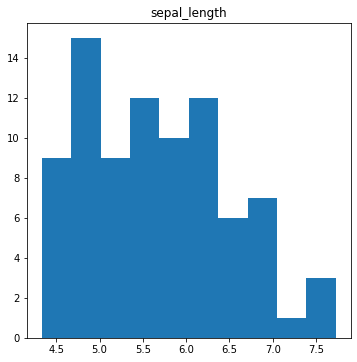

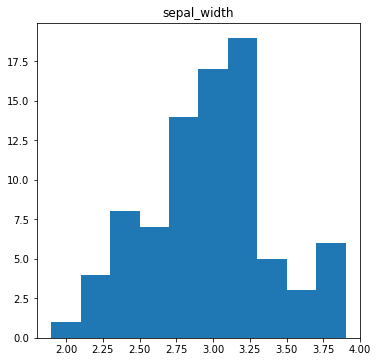

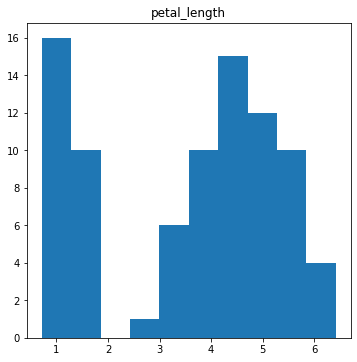

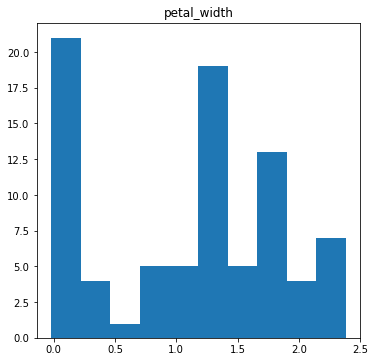

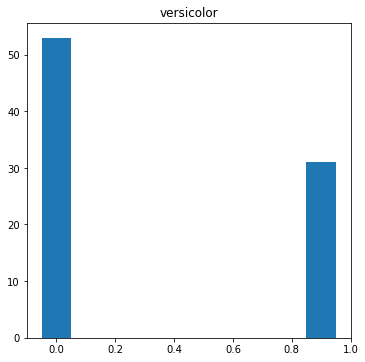

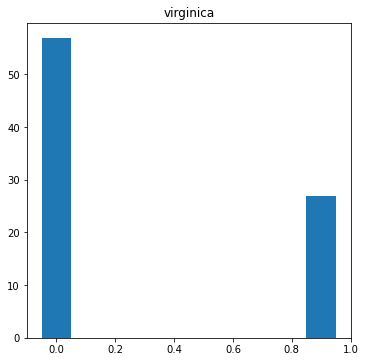

In [81]:
for quant_var in quantitative_columns:
    plt.figure(figsize=(5.8,5.8))
    plt.title(quant_var)
    plt.hist(train[quant_var], align='left', )

In [95]:
plt.figure(figsize=(5.8, 20.8))
plt.box(train['sepal_length'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 417.6x1497.6 with 1 Axes>

In [89]:
train['sepal_length']

56     6.3
40     5.0
70     5.9
23     5.1
139    6.9
149    5.9
68     6.2
64     5.6
98     5.1
81     5.5
129    7.2
57     4.9
83     6.0
75     6.6
143    6.8
84     5.4
110    6.5
43     5.0
17     5.1
122    7.7
12     4.8
119    6.0
48     5.3
100    6.3
35     5.0
120    6.9
61     5.9
142    5.8
131    7.9
79     5.7
140    6.7
41     4.5
102    7.1
114    5.8
19     5.1
9      4.9
60     5.0
26     5.0
97     6.2
76     6.8
18     5.7
107    7.3
0      5.1
51     6.4
134    6.1
11     4.8
101    5.8
71     6.1
5      5.4
128    6.4
30     4.8
47     4.6
137    6.4
126    6.2
44     5.1
92     5.8
29     4.7
10     5.4
14     5.8
146    6.3
58     6.6
85     6.0
144    6.7
74     6.4
27     5.2
106    4.9
89     5.5
148    6.2
50     7.0
95     5.7
3      4.6
25     5.0
2      4.7
67     5.8
105    7.6
80     5.5
73     6.1
52     6.9
53     5.5
78     6.0
55     5.7
125    7.2
22     4.6
113    5.7
Name: sepal_length, dtype: float64